# Implementation will feature pyCombinatorial

In [2]:
pip install pyCombinatorial

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os
import tracemalloc

# algorithms
from pyCombinatorial.algorithm import bellman_held_karp_exact_algorithm

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.uniform(0, 500, size=(n, 2))

def display_distance_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.round(2))
    
def create_distance_matrix(cities):
    return cdist(cities, cities, metric='euclidean')

In [5]:
cities = generate_cities(20)
dist_matrix = create_distance_matrix(cities)
pd.DataFrame(dist_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,250.86,412.11,163.78,165.99,177.24,434.42,395.57,215.86,330.99,422.61,295.07,92.26,235.10,465.07,407.12,154.75,303.99,427.95,298.57
1,250.86,0.00,363.21,362.53,85.29,401.23,199.58,344.65,217.04,214.79,237.31,248.71,166.53,269.49,284.79,222.93,376.65,156.98,329.26,82.77
2,412.11,363.21,0.00,358.45,354.58,412.55,339.38,18.82,198.72,153.64,228.07,125.28,348.53,180.45,224.97,225.88,399.05,519.88,79.82,299.90
3,163.78,362.53,358.45,0.00,282.79,55.15,506.74,346.95,210.45,342.91,456.82,275.95,203.07,189.68,489.25,443.24,41.50,454.69,403.54,378.67
4,165.99,85.29,354.58,282.79,0.00,318.42,273.53,335.81,174.46,224.93,284.34,230.34,82.13,222.89,330.84,268.79,293.83,189.04,339.30,140.26
5,177.24,401.23,412.55,55.15,318.42,0.00,555.21,401.43,263.92,396.81,509.70,330.91,236.52,244.80,543.09,495.87,24.59,479.37,458.66,424.58
6,434.42,199.58,339.38,506.74,273.53,555.21,0.00,325.63,306.84,204.10,116.15,280.91,342.71,350.55,145.89,114.38,531.83,305.38,270.07,135.89
7,395.57,344.65,18.82,346.95,335.81,401.43,325.63,0.00,181.32,136.19,216.13,106.82,330.66,165.66,216.41,212.96,387.17,501.24,74.88,282.11
8,215.86,217.04,198.72,210.45,174.46,263.92,306.84,181.32,0.00,133.08,246.50,79.43,150.72,52.55,279.20,233.17,243.46,359.82,213.54,194.65
9,330.99,214.79,153.64,342.91,224.93,396.81,204.10,136.19,133.08,0.00,117.68,79.36,247.27,161.00,146.34,106.54,376.54,371.58,115.84,146.48


In [ ]:
# This implementation thus far is for undirected TSP as dist_matrix[i][j] == dist_matrix[j][i])
# Later on I might make it an asymmetric distance matrix, as in dist_matrix[i][j] ≠ dist_matrix[j][i]

# Algorithms - Held-Karp Algorithm

In [6]:
# Create Results directory if it doesn't exist
if not os.path.exists('Results'):
    os.makedirs('Results')

results_file = os.path.join('Results', "held_karp_results.csv")

# Initialize with explicit dtypes
if os.path.exists(results_file):
    saved_df = pd.read_csv(results_file)
    completed_sizes = saved_df['cities'].tolist()
    print("Resuming from saved file...")
else:
    saved_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'memory_kb']).astype({
        'cities': 'int32',
        'distance': 'float64',
        'runtime_ms': 'float64',
        'memory_kb': 'float64'
    })
    completed_sizes = []

# Define city sizes for benchmarking
city_sizes = [4,8]

for size in city_sizes:
    if size in completed_sizes:
        print(f"Skipping size {size} (already completed).")
        continue

    print(f"Running Held-Karp on {size} cities...")
    
    try:
        # Generate Cities
        cities = generate_cities(size, seed=42)
        dist_matrix = create_distance_matrix(cities)

        # Start memory tracking
        tracemalloc.start()
        start = time.time()
        
        route, distance = bellman_held_karp_exact_algorithm(dist_matrix)
        
        end = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        runtime = (end - start) * 1000  # Convert to ms
        memory_kb = peak / 1024  # Convert to KB
        
        print(f"{size} cities | Distance: {distance:.2f} | Runtime: {runtime:.2f} ms | Memory: {memory_kb:.2f} KB")

        # Save results using loc assignment (no concat warning)
        saved_df.loc[len(saved_df)] = {
            'cities': size,
            'distance': round(distance, 2),
            'runtime_ms': round(runtime, 2),
            'memory_kb': round(memory_kb, 2)
        }
        saved_df.to_csv(results_file, index=False)

    except Exception as e:
        print(f"Error while processing {size} cities: {e}")
        tracemalloc.stop()  # Ensure memory tracking is stopped on error
        break  # Stop or skip, depending on preference

Resuming from saved file...
Skipping size 4 (already completed).
Skipping size 8 (already completed).


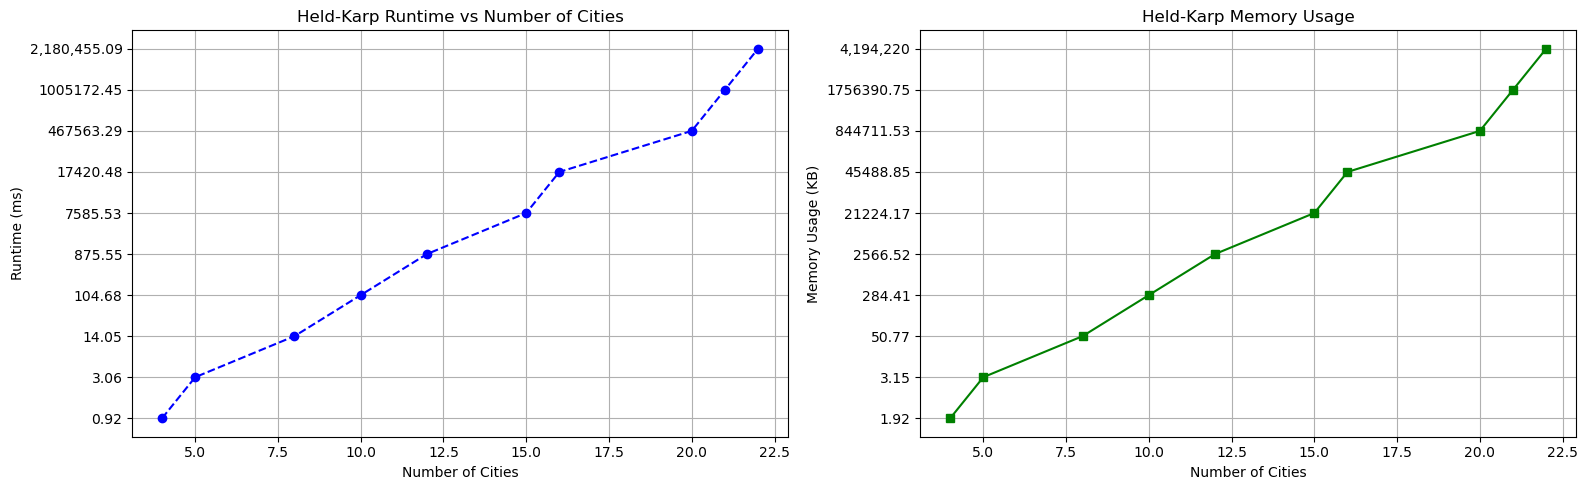

In [7]:
# Load saved results
if os.path.exists(results_file):
    df = pd.read_csv(results_file).sort_values('cities')

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    
    # Runtime plot
    ax1.plot(df['cities'], df['runtime_ms'], marker='o', linestyle='--', color='blue')
    ax1.set_title('Held-Karp Runtime vs Number of Cities')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True)
    
    # Memory usage plot
    ax2.plot(df['cities'], df['memory_kb'], marker='s', linestyle='-', color='green')
    ax2.set_title('Held-Karp Memory Usage')
    ax2.set_xlabel('Number of Cities')
    ax2.set_ylabel('Memory Usage (KB)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No saved results found.")